Условия лабораторной:
Вариант 7:
Параметры (a, σ^2) - (-5,8); γ - 0.99; n - 15; M - 2100; K - 160;
Случайная величина Z - ;
Случайная величина W - .

In [2]:
import numpy as np
import math
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
import scipy.stats as sts
import pandas as pd
from scipy.stats import norm

In [13]:
a = -5
std_dev = 8
sigma = np.sqrt(std_dev)
gamma = 0.99
n = 15
M = 2100
K = 160

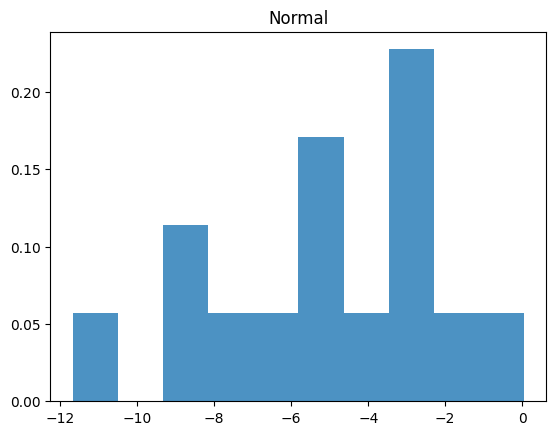

In [11]:
Sample = np.random.normal(a, sigma, n)

# создание диаграммы
plt.hist(Sample, density=True, histtype='stepfilled', alpha=0.8)
plt.title('Normal')
plt.show()

In [14]:
# значения выборки
a_estimate=np.mean(Sample)
sigma_estimate=statistics.stdev(Sample) 
dispersion = Sample.var() 

print("Параметры: ",a_estimate, dispersion, sigma_estimate)

# Вычисляем границы интервальной оценки математического ожидания при известной дисперсии

# "вручную"

interval_for_MX_=[0]*2 # создание списка
# Вычисление критического значения для заданного уровня доверия 
t_gamma=sts.norm.ppf(1/2+gamma/2, loc=0, scale=1)
print("Критическое значение = ",t_gamma)

interval_for_MX_[0]=a_estimate-sigma*t_gamma/np.sqrt(10)    # нижний предел
interval_for_MX_[1]=a_estimate+sigma*t_gamma/np.sqrt(10)    # верхний предел
print("Интервальная оценка мат.ожидания при известной дисперсии:\n", interval_for_MX_)

# с помощью встроенных статистических функций Питона
interval_estimate_2=sts.norm.interval(confidence=gamma, 
              loc=a_estimate,
              scale=sigma/np.sqrt(10)) 
print("\nИспользуя .interval:\n", interval_estimate_2)

Параметры:  -5.00786260884527 9.697958068497014 3.22345612023864
Критическое значение =  2.5758293035489004
Интервальная оценка мат.ожидания при известной дисперсии:
 [-7.3117543773137825, -2.7039708403767566]

Используя .interval:
 (-7.3117543773137825, -2.703970840376757)


In [15]:
# Вычисляем критическое значение 
t_degrees_of_freedom = len(Sample) - 1
t_alpha_over_2 = sts.t.ppf(1 - (1 - gamma) / 2, df=t_degrees_of_freedom)

# Вычисляем стандартную ошибку среднего значения
standard_error = sigma_estimate / np.sqrt(len(Sample))

# Вычисляем доверительный интервал для среднего значения
interval_estimate = (a_estimate - t_alpha_over_2 * standard_error, a_estimate + t_alpha_over_2 * standard_error)

print("Доверительный интервал при неизвестной дисперсии:\n", interval_estimate)

# Вычисляем доверительный интервал для среднего значения с использованием t-распределения

interval_estimate_2 = sts.t.interval(gamma, df=t_degrees_of_freedom, loc=a_estimate, scale=sigma_estimate / np.sqrt(len(Sample)))

print("\nИспользуя .interval:\n", interval_estimate_2)


Доверительный интервал при неизвестной дисперсии:
 (-7.48546735756176, -2.530257860128779)

Используя .interval:
 (-7.48546735756176, -2.530257860128779)


In [16]:
# Степени свободы для распределения хи-квадрат
degrees_of_freedom = n - 1

# Вычисляем критические значения для хи-квадрат распределения
chi2_lower = sts.chi2.ppf((1 - gamma) / 2, df=degrees_of_freedom)
chi2_upper = sts.chi2.ppf((1 + gamma) / 2, df=degrees_of_freedom)

# Вычисляем интервальную оценку для дисперсии
variance_estimate = np.var(Sample, ddof=1)
variance_lower = (n - 1) * variance_estimate / chi2_upper
variance_upper = (n - 1) * variance_estimate / chi2_lower

# Выводим результат
print("Доверительный интервал для дисперсии:", variance_lower, variance_upper)

Доверительный интервал для дисперсии: 4.644712383251619 35.70085284061551


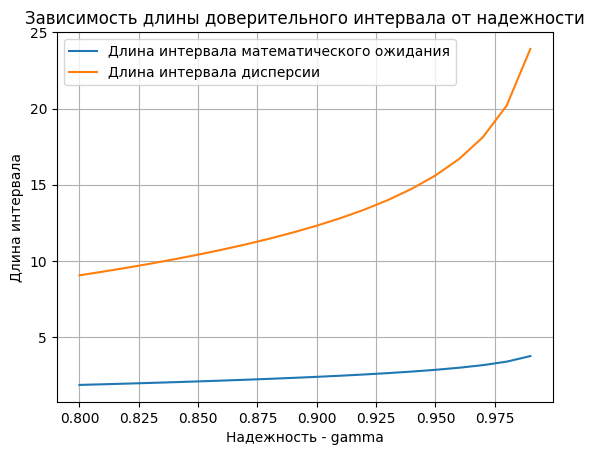

In [18]:

# Создадим список уровней доверия
confidence_levels = np.linspace(0.80, 0.99, 20)

# Списки для хранения длин интервалов для математического ожидания и дисперсии
mean_interval_lengths = []
variance_interval_lengths = []

for confidence_level in confidence_levels:
    # Вычисляем интервальную оценку для математического ожидания
    mean_interval = sts.norm.interval(confidence_level, loc=a, scale=sigma / np.sqrt(n))
    
    # Вычисляем интервальную оценку для дисперсии
    degrees_of_freedom = n - 1
    variance_estimate = sigma**2
    chi2_lower, chi2_upper = sts.chi2.interval(confidence_level, df=degrees_of_freedom)
    variance_interval = (degrees_of_freedom * variance_estimate / chi2_upper,
                         degrees_of_freedom * variance_estimate / chi2_lower)
    
    # Вычисляем длину интервалов и добавляем их в списки
    mean_interval_lengths.append(mean_interval[1] - mean_interval[0])
    variance_interval_lengths.append(variance_interval[1] - variance_interval[0])


plt.plot(confidence_levels, mean_interval_lengths, label="Длина интервала математического ожидания")
plt.plot(confidence_levels, variance_interval_lengths, label="Длина интервала дисперсии")
plt.xlabel("Надежность - gamma")
plt.ylabel("Длина интервала")
plt.legend()
plt.grid()
plt.title("Зависимость длины доверительного интервала от надежности")
plt.show()

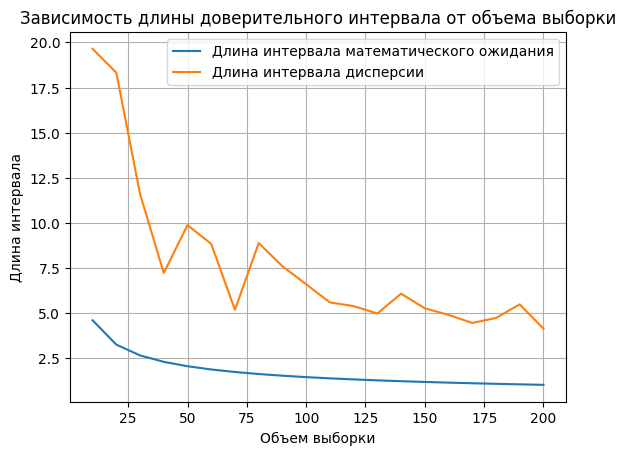

In [19]:
# Создадим список размеров выборок
sample_sizes = np.arange(10, 201, 10)

# Списки для хранения длин интервалов для математического ожидания и дисперсии
mean_interval_lengths = []
variance_interval_lengths = []

for n in sample_sizes:
    # Генерируем выборку
    Sample = np.random.normal(a, sigma, n)
    
    # Вычисляем интервальную оценку для математического ожидания
    mean_interval = sts.norm.interval(gamma, loc=np.mean(Sample), scale=sigma / np.sqrt(n))
    
    # Вычисляем интервальную оценку для дисперсии
    degrees_of_freedom = n - 1
    variance_estimate = np.var(Sample, ddof=1)
    chi2_lower, chi2_upper = sts.chi2.interval(gamma, df=degrees_of_freedom)
    variance_interval = (degrees_of_freedom * variance_estimate / chi2_upper,
                         degrees_of_freedom * variance_estimate / chi2_lower)
    
    # Вычисляем длину интервалов и добавляем их в списки
    mean_interval_lengths.append(mean_interval[1] - mean_interval[0])
    variance_interval_lengths.append(variance_interval[1] - variance_interval[0])

# Строим графики
plt.plot(sample_sizes, mean_interval_lengths, label="Длина интервала математического ожидания")
plt.plot(sample_sizes, variance_interval_lengths, label="Длина интервала дисперсии")
plt.xlabel("Объем выборки")
plt.ylabel("Длина интервала")
plt.legend()
plt.grid()
plt.title("Зависимость длины доверительного интервала от объема выборки")
plt.show()

In [20]:
MX_left=[0]*M
MX_right=[0]*M

for i in range(M):
        
        sample = np.random.normal(a, sigma, n)
        mu_estimate=np.mean(sample)

        interval_estimate_2=sts.t.interval(confidence=gamma, df=len(sample)-1,
              loc=mu_estimate,
              scale=sts.sem(sample)) 
        
        MX_left[i]  = interval_estimate_2[0]
        MX_right[i] = interval_estimate_2[1]
        
s0=pd.Series(data=MX_left)
s1=pd.Series(data=MX_right)

# Вычисляется, сколько интервалов действительно покрывают истинное 
# математическое ожидание, и оценка надежности gamma_estimate 
# вычисляется как доля интервалов, покрывающих a, относительно общего 
# числа интервалов M.

COUNT_=((s0<a)&(s1>a)).sum()
gamma_estimate=COUNT_/M 

print('Точечная оценка надежности gamma^ = ',gamma_estimate)
print('gamma = ',gamma) 

Точечная оценка надежности gamma^ =  0.9880952380952381
gamma =  0.99


In [21]:
# Создим список для хранения выборок
samples_M = []

# Моделирование M выборок
for i in range(M):
    sample = np.random.normal(a, sigma, n)
    samples_M.append(sample)

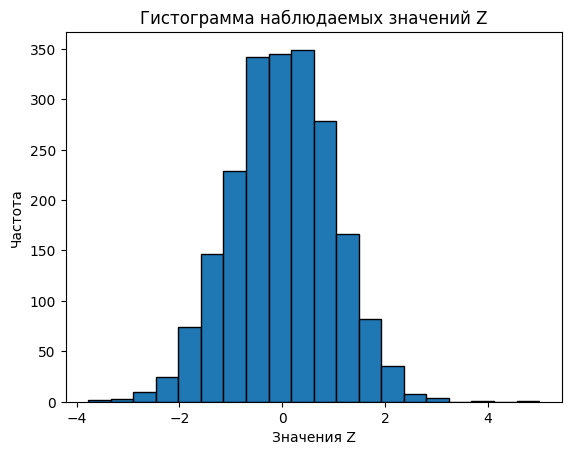

In [22]:
# Xср = (1/n) * ΣXi
# S^2 = (1/(n-1)) * Σ(Xi - Xср)^2
# Z = ((n - 1) * S^2) / (σ^2)

# Создим список для хранения наблюдаемых значений Z
observed_values_of_Z = []

# Моделирование M выборок
for i in range(M):
    
    # Вычисляем среднее значение Xср
    X_avg = np.mean(samples_M[i])
    
    # Вычисляем S^2
    S_squared = np.sum((samples_M[i] - X_avg)**2) / (n - 1)
    
    # Вычисляем наблюдаемое значение Z
    Z = ((X_avg - a)/np.sqrt(S_squared))*np.sqrt(n)
    
    observed_values_of_Z.append(Z)

# Строим гистограмму
plt.hist(observed_values_of_Z, bins=20, edgecolor='k')
plt.xlabel("Значения Z")
plt.ylabel("Частота")
plt.title("Гистограмма наблюдаемых значений Z")
plt.show()

In [24]:
print("Z будет иметь распределение хи-квадрат с (15 - 1) = 9 степенями свободы.")

Z будет иметь распределение хи-квадрат с (15 - 1) = 9 степенями свободы.


In [25]:

# Вычисляем среднее значение
mean_Z = np.mean(observed_values_of_Z)

# Вычисляем дисперсию
variance_Z = np.var(observed_values_of_Z)

# Вычисляем стандартное отклонение
std_deviation_Z = np.std(observed_values_of_Z)

# Вычисляем медиану
median_Z = np.median(observed_values_of_Z)

# Вычисляем минимальное и максимальное значения
min_Z = np.min(observed_values_of_Z)
max_Z = np.max(observed_values_of_Z)

# Выводим результат
print("Среднее значение Z:", mean_Z)
print("Дисперсия Z:", variance_Z)
print("Стандартное отклонение Z:", std_deviation_Z)
print("Медиана Z:", median_Z)
print("Минимальное значение Z:", min_Z)
print("Максимальное значение Z:", max_Z)

Среднее значение Z: 0.001577605614447704
Дисперсия Z: 0.976838683216578
Стандартное отклонение Z: 0.9883514978066144
Медиана Z: -0.007047610697468025
Минимальное значение Z: -3.7736926891179
Максимальное значение Z: 4.994005410807584


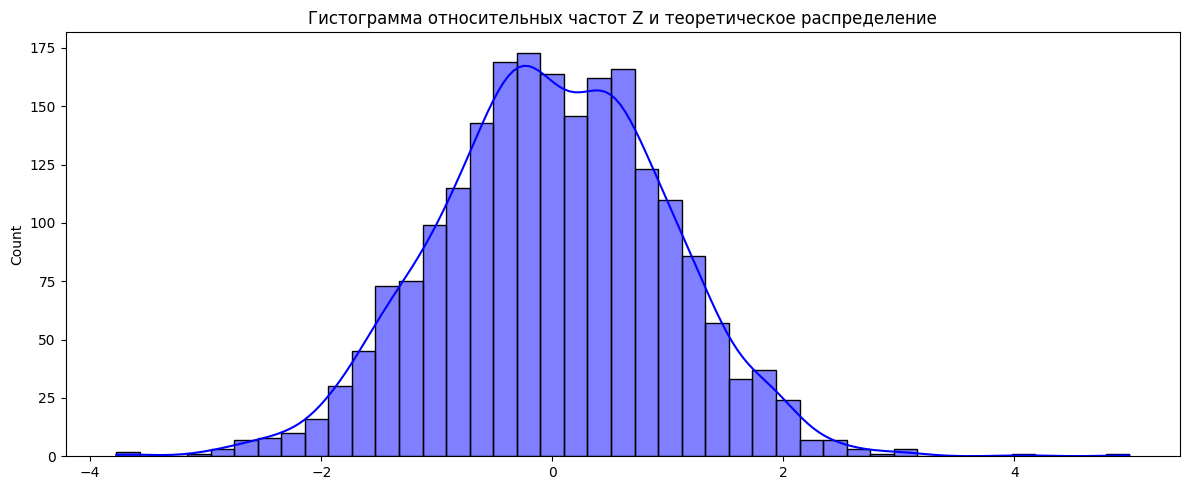

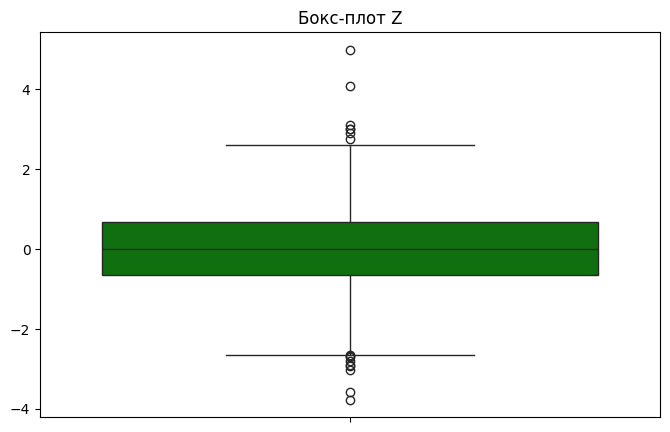

In [26]:
# Гистограмма относительных частот
plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
sns.histplot(observed_values_of_Z, kde=True, color='blue')
plt.title("Гистограмма относительных частот Z и теоретическое распределение")

plt.tight_layout()
plt.show()

# Бокс-плот
plt.figure(figsize=(8, 5))
sns.boxplot(y=observed_values_of_Z, color='green')
plt.title("Бокс-плот Z")
plt.show()